In [5]:
import torch, cv2
import torchvision
from torch.utils.data import random_split, DataLoader
from dataclass import ImagesDataset
import torch.nn as nn 
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
import matplotlib.pyplot as plt 
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((.5, .5, .5), (.5, .5, .5))]
)

In [7]:
dataset = ImagesDataset('./images_copy', transform=transform)

In [8]:
for (_, (i, _)) in enumerate(dataset):
    i = i.unsqueeze(0)

In [9]:
batch_size = 16
shuffle = True 

In [10]:
datasetsize = len(dataset)
indices = list(range(datasetsize))
split = int(np.floor(0.3 * datasetsize))
np.random.shuffle(indices)
trainidx, validx = indices[split:], indices[:split]

trainsampler = SubsetRandomSampler(trainidx)
testsampler = SubsetRandomSampler(validx)

trainloader = DataLoader(dataset, batch_size=batch_size, sampler=trainsampler)
testloader = DataLoader(dataset, batch_size=batch_size, sampler=trainsampler)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [12]:
model = models.vgg16(pretrained=True, progress=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [13]:
writer = SummaryWriter()
losses = []
for epoch in range(25):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        losses.append(loss.item())
     
    print(f'{epoch + 1} complete' )
print('training complete')            
    

1 complete
2 complete
3 complete
4 complete
5 complete
6 complete
7 complete
8 complete
9 complete
10 complete
11 complete
12 complete
13 complete
14 complete
15 complete
16 complete
17 complete
18 complete
19 complete
20 complete
21 complete
22 complete
23 complete
24 complete
25 complete
training complete


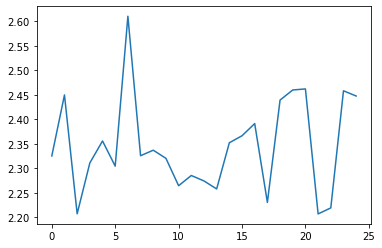

In [30]:
plt.plot(range(25), losses[:25])

In [23]:
num_correct = 0.0
num_samples = 0.0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)

        scores = model(images)
        _, predictions = scores.max()
        num_correct += (predictions == labels).sum()
        num_samples += predictions.size(0)

        print(f' {num_correct} / {num_samples} correct, accuracy = {float(num_correct / num_samples)}')


TypeError: iteration over a 0-d tensor

TypeError: iteration over a 0-d tensor